In [1]:
import chromadb
import os

In [2]:
import chromadb.utils.embedding_functions as embedding_functions
openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key=os.environ['OPENAI_API_KEY'],
                model_name="text-embedding-3-small"
            )

In [3]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [5]:
import numpy as np
#from vertexai.language_models import TextEmbeddingModel

- Get embeddings for all pieces of text.
- Store them in a 2D NumPy array (one row for each embedding).

In [9]:
embeddings = []
for input_text in input_text_lst_news:
    emb = openai_ef(
        [input_text])[0]
    #print(len(emb))
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [10]:
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 1536)
[[ 0.00714763 -0.01088703  0.01326727 ... -0.0242164   0.02097375
   0.01123199]
 [ 0.03371235  0.00416831 -0.00843419 ...  0.02251556  0.0035798
  -0.00203536]
 [ 0.03704774 -0.03347     0.01782388 ...  0.01770721 -0.00388236
   0.01816091]
 ...
 [-0.02402991 -0.01835993  0.00527141 ...  0.01657279 -0.00519427
  -0.05538836]
 [ 0.00028534 -0.03487821 -0.00364475 ... -0.045205   -0.00597334
   0.00049435]
 [-0.03549071  0.00194275 -0.02324191 ... -0.00424088  0.02390529
   0.00699508]]


#### Reduce embeddings from 1536 to 2 dimensions for visualization
- We'll use principal component analysis (PCA).
- You can learn more about PCA in [this video](https://www.coursera.org/learn/unsupervised-learning-recommenders-reinforcement-learning/lecture/73zWO/reducing-the-number-of-features-optional) from the Machine Learning Specialization.

In [11]:
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [12]:
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[-0.44160556 -0.16911588]
 [-0.50075362 -0.22844192]
 [-0.44391635  0.00973499]
 [ 0.14034341  0.54465387]
 [ 0.20851999  0.61580555]
 [ 0.4351428  -0.45315883]
 [ 0.60226932 -0.31947778]]


In [21]:
#!pip install mplcursors
#!pip install ipympl

In [22]:
def plot_2D(x_values, y_values, labels):

    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values, 
                         y_values, 
                         alpha = 0.5, 
                         edgecolors='k',
                         s = 40) 

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12) 

    plt.show()


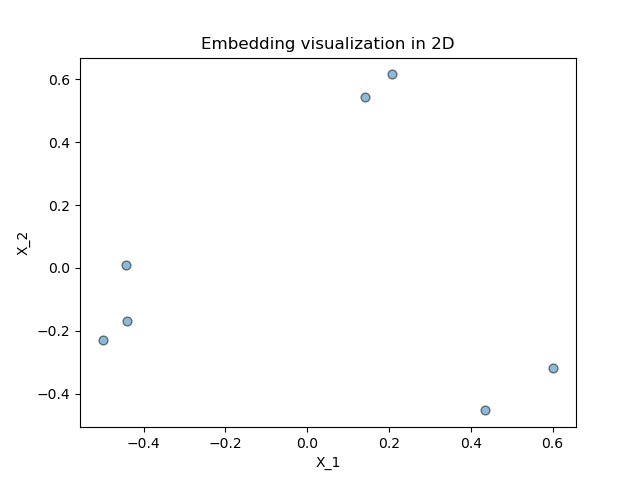

In [23]:
import matplotlib.pyplot as plt
import mplcursors
%matplotlib ipympl

#from utils import plot_2D
plot_2D(new_values[:,0], new_values[:,1], input_text_lst_news)

#### Embeddings and Similarity
- Plot a heat map to compare the embeddings of sentences that are similar and sentences that are dissimilar.

In [28]:
in_1 = """He couldn’t desert 
          his post at the power plant."""

in_2 = """The power plant needed 
          him at the time."""

in_3 = """Cacti are able to 
          withstand dry environments.""" 

in_4 = """Desert plants can 
          survive droughts.""" 

input_text_lst_sim = [in_1, in_2, in_3, in_4]

In [39]:
embeddings = []
for input_text in input_text_lst_sim:
    emb = openai_ef([input_text])[0]
    embeddings.append(emb[:100])
    
embeddings_array = np.array(embeddings) 

In [40]:
def plot_heatmap(data, x_labels=None, y_labels=None, title=None):
    fig, ax = plt.subplots(figsize=(50, 3))
    heatmap = ax.pcolor(data, cmap='coolwarm', edgecolors='k', linewidths=0.1)

    # Add color bar to the right of the heatmap
    cbar = plt.colorbar(heatmap, ax=ax)
    cbar.remove()

    # Set labels for each axis
    if x_labels:
        ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
        ax.set_xticklabels(x_labels, rotation=45, ha="right")
    if y_labels:
        ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)
        ax.set_yticklabels(y_labels, va="center")

    # Set title
    if title:
        
    plt.tight_layout()

    # Show the plot
    plt.show()
    

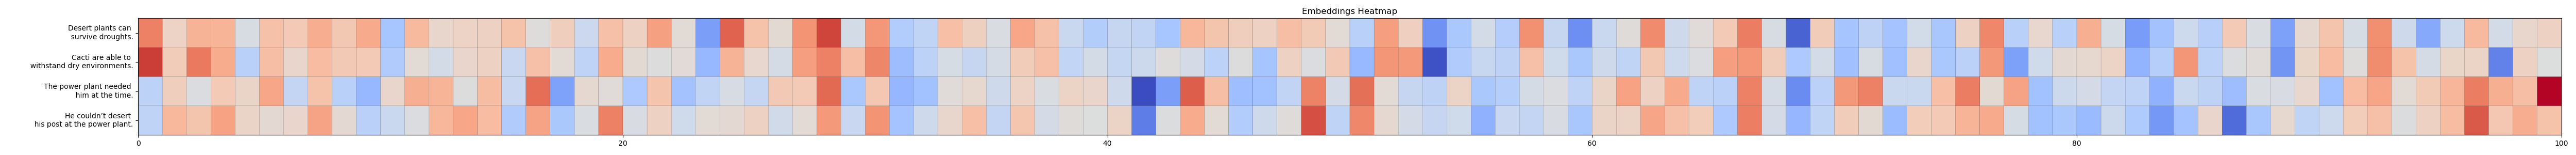

In [41]:
#from utils import plot_heatmap

y_labels = input_text_lst_sim

# Plot the heatmap
plot_heatmap(embeddings_array, y_labels = y_labels, title = "Embeddings Heatmap")

#### Compute cosine similarity
- The `cosine_similarity` function expects a 2D array, which is why we'll wrap each embedding list inside another list.
- You can verify that sentence 1 and 2 have a higher similarity compared to sentence 1 and 4, even though sentence 1 and 4 both have the words "desert" and "plant".

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
def compare(embeddings,idx1,idx2):
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])

In [26]:
print(in_1)
print(in_2)
print(compare(embeddings,0,1))

Missing flamingo discovered at swimming pool
Sea otter spotted on surfboard by beach
[[0.31921373]]


In [27]:
print(in_1)
print(in_4)
print(compare(embeddings,0,3))

Missing flamingo discovered at swimming pool
Breakfast themed food truck beloved by all!
[[0.15109812]]
